# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Data

In [2]:
data = pd.read_excel('C:/Users/Maltesh/justgrab.xlsx') 

In [3]:
data.head()

,Order ID,User Name,PHONE,EMAIL,Amount Paid,Time,Date
0,011917AEA0,shashank,9916807591,shashanknaik0705@gmail.com,₹90,13:30:54,2018-09-15
1,1105323819,aravindh,9113887966,vijayaravindh1999@gmail.com,₹30,11:11:30,2018-09-15
2,1114326A66,prahalad babu,9113699490,prahaladbabu13@gmail.com,₹10,11:17:27,2018-09-15
3,246144430,shashank,9916807591,shashanknaik0705@gmail.com,₹70,15:02:51,2018-09-14
4,1216384DF7,Akash,9686178945,akashincrp@gmail.com,₹80,12:36:32,2018-09-12


# Cleaning Data

Removing E-mail, Phone No. and OrderId as they are not required 

In [4]:
df = data.drop(['PHONE','EMAIL','Order ID'], axis = 1)

In [5]:
df.head()

,User Name,Amount Paid,Time,Date
0,shashank,₹90,13:30:54,2018-09-15
1,aravindh,₹30,11:11:30,2018-09-15
2,prahalad babu,₹10,11:17:27,2018-09-15
3,shashank,₹70,15:02:51,2018-09-14
4,Akash,₹80,12:36:32,2018-09-12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
User Name      235 non-null object
Amount Paid    235 non-null object
Time           235 non-null object
Date           235 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 7.4+ KB


In [7]:
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

In [8]:
type(df['Date'])

pandas.core.series.Series

In [9]:
df['date_time'] = df['Date']+' '+df['Time']

In [10]:
df.head()

,User Name,Amount Paid,Time,Date,date_time
0,shashank,₹90,13:30:54,2018-09-15,2018-09-15 13:30:54
1,aravindh,₹30,11:11:30,2018-09-15,2018-09-15 11:11:30
2,prahalad babu,₹10,11:17:27,2018-09-15,2018-09-15 11:17:27
3,shashank,₹70,15:02:51,2018-09-14,2018-09-14 15:02:51
4,Akash,₹80,12:36:32,2018-09-12,2018-09-12 12:36:32


In [11]:
df = df.drop(['Time','Date'], axis = 1)

# Checking Customer Order Frequency

In [12]:
df.head()

,User Name,Amount Paid,date_time
0,shashank,₹90,2018-09-15 13:30:54
1,aravindh,₹30,2018-09-15 11:11:30
2,prahalad babu,₹10,2018-09-15 11:17:27
3,shashank,₹70,2018-09-14 15:02:51
4,Akash,₹80,2018-09-12 12:36:32


In [13]:
df['User Name'].nunique()

75

In [14]:
df1 = df.drop(['Amount Paid','date_time'], axis = 1)

In [15]:
df1.head()

,User Name
0,shashank
1,aravindh
2,prahalad babu
3,shashank
4,Akash


In [16]:
df1 = df1['User Name'].value_counts()

In [17]:
df1 = pd.DataFrame(df1)

In [18]:
df1 = df1.rename(columns = {'User Name':'Frequency'})

In [19]:
df1 = df1.sort_values(by=['Frequency'], ascending=False)

This represents the frequency of order made by individual customer

In [20]:
df1.head()

,Frequency
nithin shivakumar,37
aravindh,16
Himanshu Goyal,15
Azra,12
Lingaraj,9


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, nithin shivakumar to Lokesh Loki
Data columns (total 1 columns):
Frequency    75 non-null int64
dtypes: int64(1)
memory usage: 1.2+ KB


# Constructing Time-Series Analysis

In [22]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [23]:
df.head()

,User Name,Amount Paid,date_time
0,shashank,₹90,2018-09-15 13:30:54
1,aravindh,₹30,2018-09-15 11:11:30
2,prahalad babu,₹10,2018-09-15 11:17:27
3,shashank,₹70,2018-09-14 15:02:51
4,Akash,₹80,2018-09-12 12:36:32


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
User Name      235 non-null object
Amount Paid    235 non-null object
date_time      235 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.6+ KB


In [25]:
df = df.sort_values(by=['date_time'], ascending=True)

In [26]:
df.head()

,User Name,Amount Paid,date_time
210,kiran,₹11,2018-07-10 15:11:38
209,nithin shivakumar,₹3,2018-07-23 14:29:35
208,nithin shivakumar,₹3,2018-07-23 15:26:03
207,mohan,₹3,2018-07-23 16:00:16
206,nithin shivakumar,₹4,2018-07-23 16:01:32


In [27]:
df2 = df.drop(['User Name'], axis=1)
df2.head()

,Amount Paid,date_time
210,₹11,2018-07-10 15:11:38
209,₹3,2018-07-23 14:29:35
208,₹3,2018-07-23 15:26:03
207,₹3,2018-07-23 16:00:16
206,₹4,2018-07-23 16:01:32


In [28]:
df2['date'] = df['date_time'].dt.date
df2 = df2.drop(['date_time'], axis = 1)

In [29]:
df2['Amount Paid'] = df2['Amount Paid'].str.lstrip('₹')

In [30]:
df2['Amount Paid'] = df2['Amount Paid'].astype(int)

In [31]:
revenue = df2.groupby(['date'])['Amount Paid'].sum().reset_index(name='Revenue')

In [32]:
revenue['date'] = pd.to_datetime(revenue['date'], infer_datetime_format=True)

In [33]:
idxdata = revenue.set_index(['date'])

In [34]:
idxdata.head()

,Revenue
date,
2018-07-10,11
2018-07-23,23
2018-07-24,3
2018-08-03,3
2018-08-06,50


In [35]:
idxdata.head()

,Revenue
date,
2018-07-10,11
2018-07-23,23
2018-07-24,3
2018-08-03,3
2018-08-06,50


In [36]:
idxdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-07-10 to 2018-09-15
Data columns (total 1 columns):
Revenue    36 non-null int32
dtypes: int32(1)
memory usage: 432.0 bytes


In [37]:
idxdata.describe()

,Revenue
count,36.000000
mean,184.194444
std,176.281564
min,2.000000
25%,44.000000
50%,132.000000
75%,275.750000
max,630.000000


# Plotting Revenue

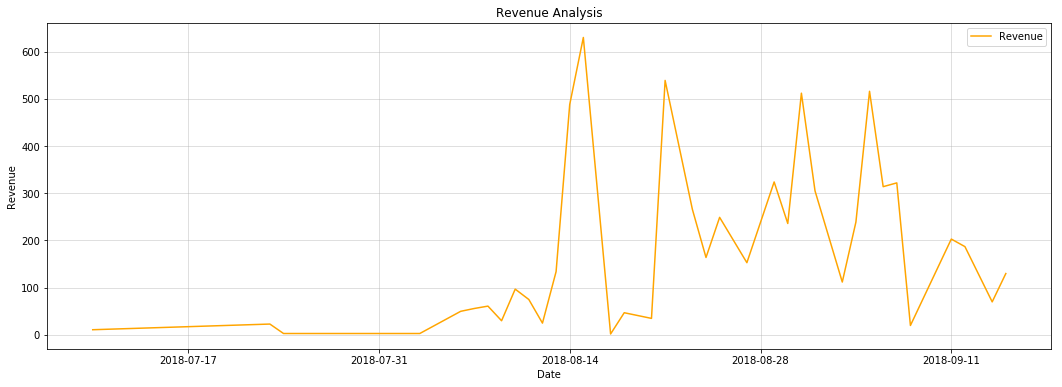

In [38]:
plt.figure(figsize=(18,6))

plt.plot(idxdata, color='orange', label='Revenue')
plt.title('Revenue Analysis')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(alpha = 0.5)

In [41]:
p1 = revenue.iloc[:3,:]
p2 = revenue.iloc[3:25,:]
p3 = revenue.iloc[25:,:]

s1 = p1.set_index(['date'])
s2 = p2.set_index(['date'])
s3 = p3.set_index(['date'])

# Per Day Revenue Analysis

In [42]:
revenue

,date,Revenue
0,2018-07-10,11
1,2018-07-23,23
2,2018-07-24,3
3,2018-08-03,3
4,2018-08-06,50
5,2018-08-07,56
6,2018-08-08,61
7,2018-08-09,30
8,2018-08-10,97
9,2018-08-11,75


In [43]:
revenue['month'] = pd.DatetimeIndex(revenue['date']).month

In [44]:
revenue.groupby(['month'])['Revenue'].sum()

month
7      37
8    4176
9    2418
Name: Revenue, dtype: int32

# Detailed View of Revenue Breakdown

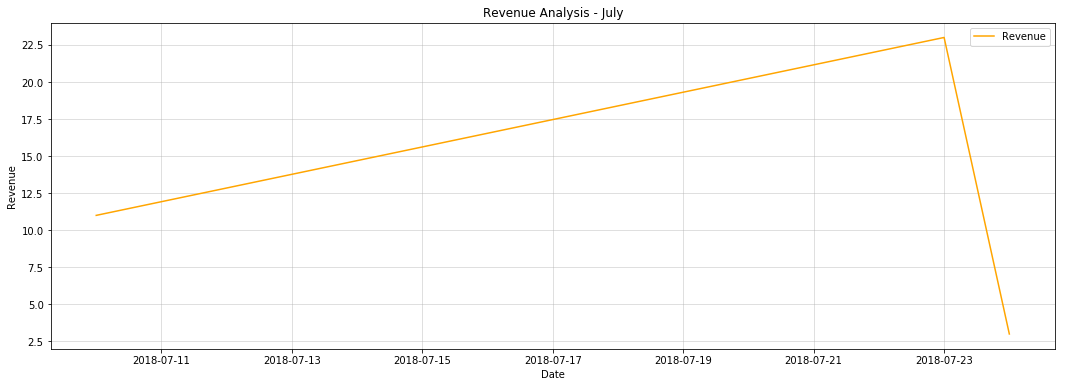

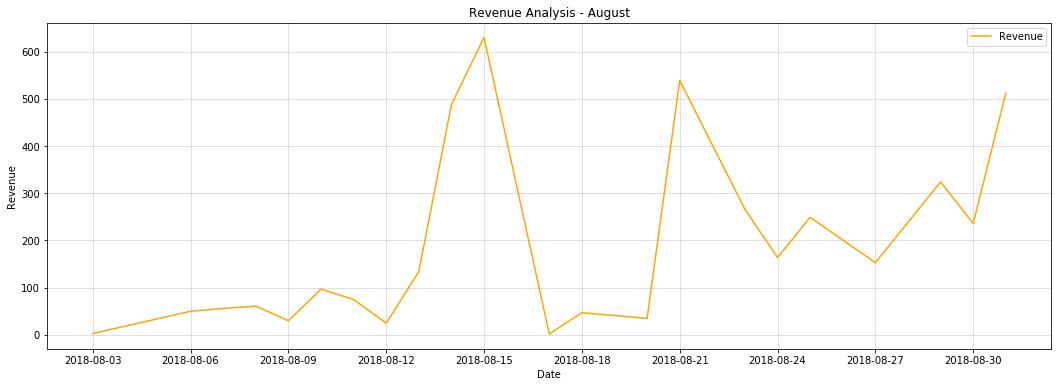

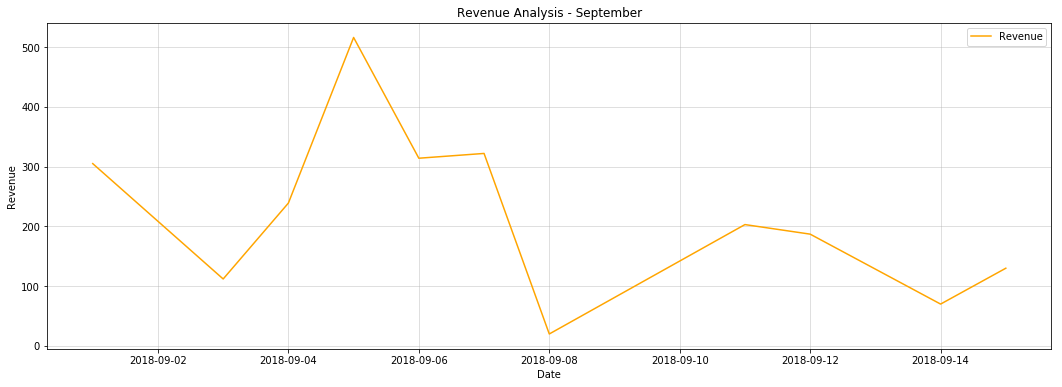

In [47]:
plt.figure(figsize=(18,6))
plt.title('Revenue Analysis - July')
plt.plot(s1, color='orange', label='Revenue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(alpha = 0.5)
plt.show()

plt.figure(figsize=(18,6))
plt.title('Revenue Analysis - August')
plt.plot(s2, color='orange', label='Revenue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(alpha = 0.5)
plt.show()

plt.figure(figsize=(18,6))
plt.title('Revenue Analysis - September')
plt.plot(s3, color='orange', label='Revenue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(alpha = 0.5)
plt.show()


# Report :

General:
- There is no continuous data recorded i.e there are few missing dates 
- July saw minimal orders and revenue
- August had good amount of orders 
- September beginning was promising but after 1st weekend revenue cut by more than 50% 

Revenue: 
- July :      ₹ 37
- August :    ₹ 4176
- September : ₹ 2418